In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

File data komt van: https://downloads.rijkswaterstaatdata.nl/filedata/

In [2]:
data = pd.read_csv("Data/2024-01_rws_filedata.csv",sep=';')
dfs = pd.DataFrame()
for year in range(1,13,1):
    df_temp = pd.read_csv(("Data/2024-{:02d}_rws_filedata.csv").format(year),sep=';')
    dfs = pd.concat([dfs, df_temp], axis=0,ignore_index=True)
data = dfs

In [3]:
#definitions
shortlong_border = 20
ampm_border = 12

In [4]:
def getHPrange(beginHP,endHP):
    if endHP>beginHP:
        return np.arange(beginHP,endHP,0.1).round(2)
    else:
        return np.arange(endHP,beginHP,0.1).round(2)

datac = pd.DataFrame(data["NLSitNummer"])
datac['DateTimeStart'] = pd.to_datetime(data.DatumFileBegin+' '+data.TijdFileBegin)
datac['DateTimeEnd'] = pd.to_datetime(data.DatumFileEind+' '+data.TijdFileEind)
datac['Duration'] = data.FileDuur.str.replace(',','.').astype('float64')
datac['Road'] = data.RouteOms.astype('category')
datac['HPstart'] = data.HectometerKop.str.replace(',','.').astype('float64')
datac['HPend'] = data.HectometerStaart.str.replace(',','.').astype('float64')
datac['direction'] = data.hectometreringsrichting;
datac['HPrange'] = datac.apply(lambda x: getHPrange(x['HPstart'],x['HPend']),axis=1)
datac['ampm'] = datac.DateTimeStart.dt.time.apply(lambda x: 'am' if x<datetime.time(ampm_border) else 'pm')
datac['shortlong'] = datac.Duration.apply(lambda x: 'short' if x<shortlong_border else 'long')
datac['month'] = data.DatumFileBegin.apply(lambda x: x[5:7]).astype(int)
datac

#USE JOIN TO ADD THE WHEATHER INFO OF THE DAY



,NLSitNummer,DateTimeStart,DateTimeEnd,Duration,Road,HPstart,HPend,direction,HPrange,ampm,shortlong,month
0,3908337,2024-01-17 15:41:29,2024-01-17 17:15:03,93.567,A27,52.4,55.3,aflopend,"[52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53.0, 53....",pm,long,1
1,3908338,2024-01-17 15:41:29,2024-01-17 15:46:01,4.533,A2,208.6,210.8,aflopend,"[208.6, 208.7, 208.8, 208.9, 209.0, 209.1, 209...",pm,short,1
2,3908339,2024-01-17 15:41:29,2024-01-17 16:08:00,26.517,A4,61.2,59.1,oplopend,"[59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59....",pm,long,1
3,3908340,2024-01-17 15:41:29,2024-01-17 15:43:00,1.517,A73,41.8,43.9,aflopend,"[41.8, 41.9, 42.0, 42.1, 42.2, 42.3, 42.4, 42....",pm,short,1
4,3908341,2024-01-17 15:42:29,2024-01-17 15:44:00,1.517,A13,13.5,9.6,oplopend,"[9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 1...",pm,short,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440530,4453346,2024-12-17 07:44:28,2024-12-17 07:46:00,1.533,A27,102.5,105.5,aflopend,"[102.5, 102.6, 102.7, 102.8, 102.9, 103.0, 103...",am,short,12
440531,4453347,2024-12-17 07:44:28,2024-12-17 07:49:00,4.533,A2,44.0,48.3,aflopend,"[44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44....",am,short,12
440532,4453348,2024-12-17 07:44:28,2024-12-17 07:47:00,2.533,A2,174.5,176.5,aflopend,"[174.5, 174.6, 174.7, 174.8, 174.9, 175.0, 175...",am,short,12
440533,4453349,2024-12-17 07:44:28,2024-12-17 07:47:00,2.533,A4,49.9,47.4,oplopend,"[47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48.0, 48....",am,short,12


In [ ]:
a = datac.set_index(['Road','direction','ampm','shortlong']).sort_index()
a

In [ ]:
year = 2024
month = 12
day = 25

b = a.reset_index(level=['Road','direction']).sort_index()
mask = (b['DateTimeStart']>datetime.datetime(year,month,day)) & (b['DateTimeStart']<datetime.datetime(year,month,day+1))
b = b[mask]

plt.figure(figsize=(12,6))
plt.suptitle('duration per trafic grouped by Road')
xloc_am=1
xloc_pm=1
for road in b.Road.sort_values().unique():
    mask_road_am = b.loc['am','Road']==road 
    mask_road_pm = b.loc['pm','Road']==road 
    if mask_road_am.sum():
        plt.subplot(1,2,1)
        plt.plot(np.arange(xloc_am,xloc_am+(mask_road_am).sum()),b.loc['am','Duration'][mask_road_am], marker='o', linestyle='',label = road)  
        plt.legend(ncol=3)
        plt.title('morning')
        xloc_am=xloc_am+(mask_road_am).sum()
    if mask_road_pm.sum():
        plt.subplot(1,2,2)
        plt.plot(np.arange(xloc_pm,xloc_pm+(mask_road_pm).sum()),b.loc['pm','Duration'][mask_road_pm], marker='o', linestyle='',label = road)  
        plt.legend(ncol=3)
        plt.title('afternoon')
        xloc_pm=xloc_pm+(mask_road_pm).sum()
plt.ylabel('Duration [m]')
plt.show()


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.suptitle('Number of trafics')
plt.hist([b.swaplevel().sort_index().loc['short','Road'].sort_values(),b.swaplevel().sort_index().loc['long','Road'].sort_values()],bins=b.Road.nunique(),label=['<20','>20'])
plt.title('split per duration')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.hist([b.loc['am','Road'].sort_values(),b.loc['pm','Road'].sort_values()],bins=b.Road.nunique(),label=['morning','afternoon'])
plt.title('split per moment on the day')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
b = a.reset_index(level=['Road','direction']).sort_index()
# b.query("DateTimeStart>datetime.datetime('{0}','{1}','{2}').format(year,month,day)")
b.query("Duration>20")

In [ ]:
road = 'N434'
durations = ['short','long']
directions = ['aflopend','oplopend']
xtick_width = 1

plt.figure(figsize=(15,9))
plt.suptitle(road)
   
cntr = 1
for dur in durations:
    for direc in directions:
        plt.subplot(2,2,cntr)
        plot_data_am = []
        plot_data_pm = []
        if (a.index.isin([(road, direc,'am',dur)]).any()):
            plot_data_am = (a.loc[(road,direc,'am',dur)].explode('HPrange'))['HPrange']
        if (a.index.isin([(road, direc,'pm',dur)]).any()):
            plot_data_pm = (a.loc[(road,direc,'pm',dur)].explode('HPrange'))['HPrange']
        x_ticks = np.arange(0,a.loc[road,'HPstart'].max(),xtick_width)
        plt.hist([plot_data_am,plot_data_pm],label=['am','pm'],bins=100)
        plt.xticks(x_ticks)
        plt.xticks(rotation=90)
        if direc=='oplopend':
            plt.xlim(-xtick_width,a.loc[road,'HPstart'].max())
        elif direc=='aflopend':
            plt.xlim(-2.5,a.loc[road,'HPend'].max())
        plt.title(('Trafic {} {}').format(dur,direc))
        plt.legend()
        cntr = cntr+1
plt.show()

In [ ]:
x_ticks

In [ ]:
a.index.levels[0]



In [ ]:
c = a.set_index('month',append=True).swaplevel(0)
plt.bar(range(0,12,1),c.Duration.groupby('month').count())
plt.title('Total number of trafics per month')
plt.ylabel('Counts')
plt.xlabel('Month')
plt.show()

grouped = c.query('Road.str.contains("N")').swaplevel(0,3).loc['short'].groupby(['Road','month',])['Duration'].count().unstack()
grouped.plot.bar(figsize=(20,20),subplots=True,sharey=True)
grouped = c.query('Road.str.contains("N")').swaplevel(0,3).loc['long'].groupby(['Road','month',])['Duration'].count().unstack()
grouped.plot.bar(figsize=(20,20),subplots=True,sharey=True)
plt.title('Number of trafics per Road per month')
plt.ylabel('Counts')
plt.show()





In [ ]:
road = 'A1'
durations = ['short','long']
directions = ['aflopend','oplopend']
xtick_width = 5

plt.figure(figsize=(15,9))
plt.suptitle(road)
   
cntr = 1
for dur in durations:
    for direc in directions:
        plt.subplot(2,2,cntr)
        plot_data_am = []
        plot_data_pm = []
        if datac.query('Road==@road and direction==@direc and ampm=="am" and shortlong==@dur').count().any():
            plot_data_am = (datac.query('Road==@road and direction==@direc and ampm=="am" and shortlong==@dur').explode('HPrange'))['HPrange']
        if datac.query('Road==@road and direction==@direc and ampm=="pm" and shortlong==@dur').count().any():
            plot_data_pm = (datac.query('Road==@road and direction==@direc and ampm=="pm" and shortlong==@dur').explode('HPrange'))['HPrange']
            test = [plot_data_am,plot_data_pm]
        x_ticks = np.arange(0,datac.query('Road==@road')['HPstart'].max(),xtick_width)
        plt.hist([plot_data_am,plot_data_pm],label=['am','pm'],bins=100)
        plt.xticks(x_ticks)
        plt.xticks(rotation=90)
        if direc=='oplopend':
            plt.xlim(0,d.query('Road==@road')['HPstart'].max())
        elif direc=='aflopend':
            plt.xlim(0,d.query('Road==@road')['HPend'].max())
        plt.title(('Trafic {} {}').format(dur,direc))
        plt.legend()
        cntr = cntr+1
plt.show()

In [ ]:
year = 2024
month = 1
day = 8

data_day = datac.query('DateTimeStart>datetime.datetime(@year,@month,@day) and DateTimeStart<datetime.datetime(@year,@month,@day+1)').reset_index() 

plt.figure(figsize=(12,6))
plt.suptitle('duration per trafic grouped by Road')
xloc_am=1
xloc_pm=1
for road in b.Road.sort_values().unique():
    data_road_am = data_day.query('ampm=="am" & Road==@road')  
    data_road_pm = data_day.query('ampm=="pm" & Road==@road')  
    if data_road_am.count().any():
        plt.subplot(1,2,1)
        data_road_am['Duration'].plot(marker='o', linestyle='',label = road)  
        plt.legend(ncol=3)
        plt.title('morning')
        xloc_am=xloc_am+(data_road_am.index.size)
    if data_road_pm.count().any():
        plt.subplot(1,2,2)
        data_road_pm['Duration'].plot(marker='o', linestyle='',label = road)
        xloc_pm=xloc_pm+(data_road_pm.index.size)
        # plt.xticks(range(0,xloc_pm))
        plt.legend(ncol=3)
        plt.title('afternoon')        
plt.ylabel('Duration [m]')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.suptitle('Number of trafics')
data_short = data_day.query('shortlong=="short"')['Road'];
data_long = data_day.query('shortlong=="long"')['Road'];
plt.hist([data_short,data_long],bins=b.Road.nunique(),label=['<20','>20'])
plt.title('split per duration')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(1,2,2)
data
data_am = data_day.query('ampm=="am"')['Road'];
data_pm = data_day.query('ampm=="pm"')['Road'];
plt.hist([data_am,data_pm],bins=b.Road.nunique(),label=['morning','afternoon'])
plt.title('split per moment on the day')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
datac.groupby('Road').Duration.count().plot(kind='bar')
plt.show()
datac.groupby('month').Duration.count().plot(kind='bar')
plt.show()

In [ ]:
gbo_per_road = datac.groupby(['Road'])
l_per_road = list(gbo_per_road)


for road_id in range(0,2):#datac.Road.nunique()):
    # l_short_long = list(l_per_road[road_id][1].groupby('shortlong'))
    l_am_pm = list(l_per_road[road_id][1].groupby('ampm'))
    plot_data = [l_am_pm[0][1].explode('HPrange')['HPrange'],l_am_pm[1][1].explode('HPrange')['HPrange']];
    plt.hist(plot_data,bins=100)
    plt.title(l_per_road[road_id][0][0])
    plt.show()

In [ ]:
l_per_road[road_id][0][0]

C:\Users\rbijman\AppData\Local\Temp\ipykernel_14204\2194712325.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gbo_per_road = datac.query('Road.str.contains("A")').groupby(['Road','ampm'])['Duration'].count().unstack('ampm').plot.bar(figsize=(12,6))


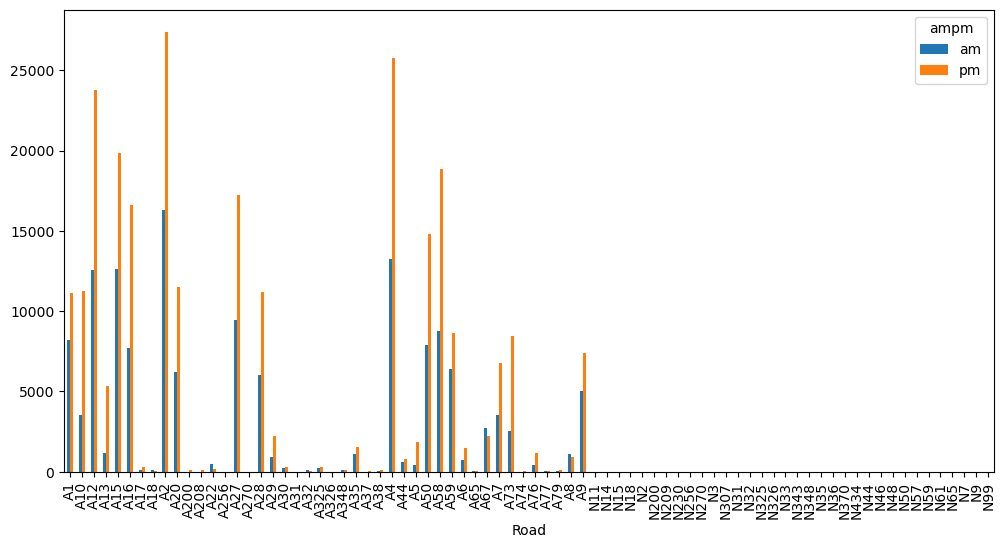

In [7]:
gbo_per_road = datac.query('Road.str.contains("A")').groupby(['Road','ampm'])['Duration'].count().unstack('ampm').plot.bar(figsize=(12,6))
plt.show()

In [ ]:
gbo_per_road = datac.query('Road.str.contains("A")').groupby('Road',observed=True)['Duration'].plot.bar(figsize=(12,6))
plt.show()